In [45]:
import pandas as pd
import numpy as np

df = pd.read_excel('sampledatainsurance.xlsx',sheet_name='PolicyData')

PRINT DATAFRAME

In [2]:
print(df.head())

   Policy     Expiry Location State   Region  InsuredValue Construction  \
0  100242 2021-01-02    Urban    NY     East       1617630        Frame   
1  100314 2021-01-02    Urban    NY     East       8678500  Fire Resist   
2  100359 2021-01-02    Rural    WI  Midwest       2052660        Frame   
3  100315 2021-01-03    Urban    NY     East      17580000        Frame   
4  100385 2021-01-03    Urban    NY     East       1925000      Masonry   

  BusinessType Earthquake Flood  
0       Retail          N     N  
1    Apartment          Y     Y  
2      Farming          N     N  
3    Apartment          Y     Y  
4  Hospitality          N     N  


PRINT INSURED VALUE MORE THAN 5 Mn AND FRAME CONSTRUCTION

In [9]:
print(df[(df['InsuredValue']>5000000) & (df['Construction'] == 'Frame')])

     Policy     Expiry Location State   Region  InsuredValue Construction  \
3    100315 2021-01-03    Urban    NY     East      17580000        Frame   
5    100388 2021-01-04    Urban    IL  Midwest      12934500        Frame   
8    100265 2021-01-07    Urban    NY     East      14100000        Frame   
10   100399 2021-01-08    Urban    NY     East      13925190        Frame   
11   100329 2021-01-09    Urban    NY     East       6350000        Frame   
..      ...        ...      ...   ...      ...           ...          ...   
479  101107 2021-12-25    Urban    NY     East       9377600        Frame   
483  101111 2021-12-26    Rural    NY     East       6235057        Frame   
490  101116 2021-12-29    Urban    NY     East       8245000        Frame   
493  101117 2021-12-30    Urban    NY     East       9050000        Frame   
498  101125 2021-12-31    Urban    NY     East      16482200        Frame   

    BusinessType Earthquake Flood  
3      Apartment          Y     Y  
5  

GROUP BY STATE,REGION AND PRINT COUNT OF INSURED-VALUE

In [23]:
print(df.groupby(by=['State','Region'])['InsuredValue'].count())

State  Region   
IL     Midwest       14
ME     Northeast      4
MI     Central        7
MN     Midwest        2
NH     Northeast      7
NJ     East          76
NY     East         261
OH     Central       14
VT     Northeast     23
WI     Midwest       92
Name: InsuredValue, dtype: int64


GROUP BY STATE,REGION AND PRINT SORTED INSURED-VALUE

In [28]:
print(df.groupby(by=['State','Region'])['State','Region','InsuredValue'].agg({'InsuredValue':sorted}))

                                                      InsuredValue
State Region                                                      
IL    Midwest    [172100, 787500, 1702350, 1895000, 2182250, 29...
ME    Northeast                 [552300, 790000, 1444255, 7150000]
MI    Central    [315000, 394220, 601000, 714000, 1991600, 3255...
MN    Midwest                                   [1305100, 1834200]
NH    Northeast  [97920, 145680, 320000, 345000, 626000, 132760...
NJ    East       [205000, 296000, 299400, 320100, 371600, 37350...
NY    East       [30000, 82000, 100000, 140000, 192000, 199000,...
OH    Central    [218490, 320000, 608500, 661900, 1202090, 1529...
VT    Northeast  [1325200, 1588100, 1806500, 1960000, 2099525, ...
WI    Midwest    [105000, 275000, 294700, 500500, 504000, 53904...


/tmp/ipykernel_4810/416329581.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(by=['State','Region'])['State','Region','InsuredValue'].agg({'InsuredValue':sorted}))


PRINT CONSTRUCTION PERCENTAGES

In [36]:
df_csum_individual=df.groupby('Construction').apply(len)
df_csum_total=len(df)
# print(df_csum_total)
df_csum_individual['percentages'] = (df_csum_individual/df_csum_total)*100
print(df_csum_individual['percentages'])

Construction
Fire Resist     7.8
Frame          64.4
Masonry        21.6
Metal Clad      6.2
dtype: float64


CONSTRUCTION PERCENTAGES GRAPH

<AxesSubplot:xlabel='Construction'>

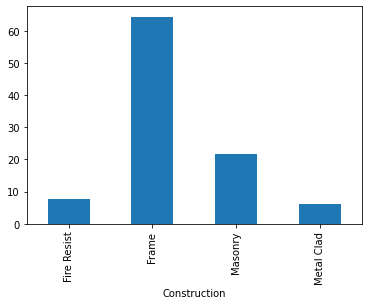

In [44]:
df_csum_individual['percentages'].plot(kind='bar')

PRINT EARTHQUAKE AND FLOOD YES COUNT 

In [55]:
e_count = (df[['Earthquake','Flood']].loc[df['Earthquake'] == 'Y'].size)
f_count = (df['Flood'].loc[df['Flood'] == 'Y'].size)
print("Earthquake count:"+str(e_count)+" and flood count:"+str(f_count))

Earthquake count:512 and flood count:249
